# Notebook to test model predictions

### Clip

In [23]:
from aircraft_anomaly_detection.models.clip_predictor import CLIP

predictor = CLIP(class_names=["defect", "no defect"])

# Predict all images in a folder
folder_preds = predictor.predict("../data/LTAA-FLUX-Small-test-dataset-generated/Generated/")
print(folder_preds)


{'Flux_1.jpg': [{'label': 'defect', 'confidence': 71.57}, {'label': 'no defect', 'confidence': 28.43}], 'Flux_10.jpg': [{'label': 'defect', 'confidence': 73.26}, {'label': 'no defect', 'confidence': 26.74}], 'Flux_2.jpg': [{'label': 'defect', 'confidence': 82.59}, {'label': 'no defect', 'confidence': 17.41}], 'Flux_3.jpg': [{'label': 'defect', 'confidence': 86.04}, {'label': 'no defect', 'confidence': 13.96}], 'Flux_4.jpg': [{'label': 'defect', 'confidence': 74.4}, {'label': 'no defect', 'confidence': 25.6}], 'Flux_5.jpg': [{'label': 'defect', 'confidence': 84.04}, {'label': 'no defect', 'confidence': 15.96}], 'Flux_6.jpg': [{'label': 'defect', 'confidence': 80.62}, {'label': 'no defect', 'confidence': 19.38}], 'Flux_7.jpg': [{'label': 'defect', 'confidence': 77.52}, {'label': 'no defect', 'confidence': 22.48}], 'Flux_8.jpg': [{'label': 'defect', 'confidence': 87.25}, {'label': 'no defect', 'confidence': 12.75}], 'Flux_9.jpg': [{'label': 'defect', 'confidence': 59.73}, {'label': 'no de

### Grouding Dino + SAM

final text_encoder_type: bert-base-uncased


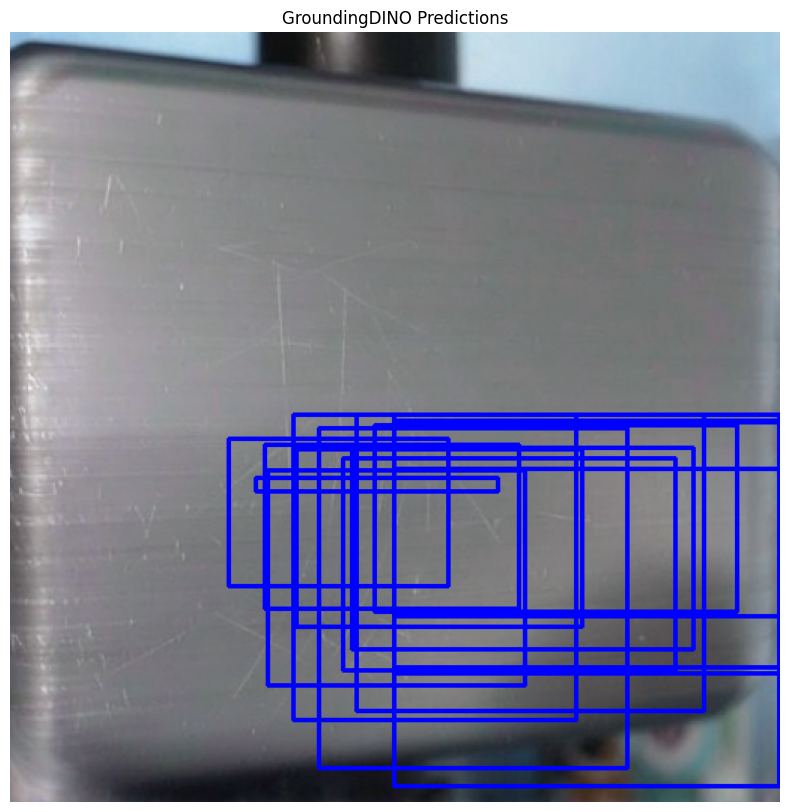

AttributeError: 'SAM' object has no attribute 'set_image'

In [ ]:
from aircraft_anomaly_detection.models.dino import DINO
from aircraft_anomaly_detection.models.sam import SAM

image_path = "../data/LTAA-FLUX-Small-test-dataset-generated/Generated/Flux_1.jpg"
text_prompt = "small scratches"

# Init models
dino = DINO(
    config_path="../src/aircraft_anomaly_detection/models/config/GroundingDINO_SwinT_OGC.py",
    weights_path="../data/weights/groundingdino_swint_ogc.pth",
)

# DINO prediction
boxes, phrases = dino.predict(image_path, prompt=text_prompt)
dino.plot(image_path, boxes, phrases)

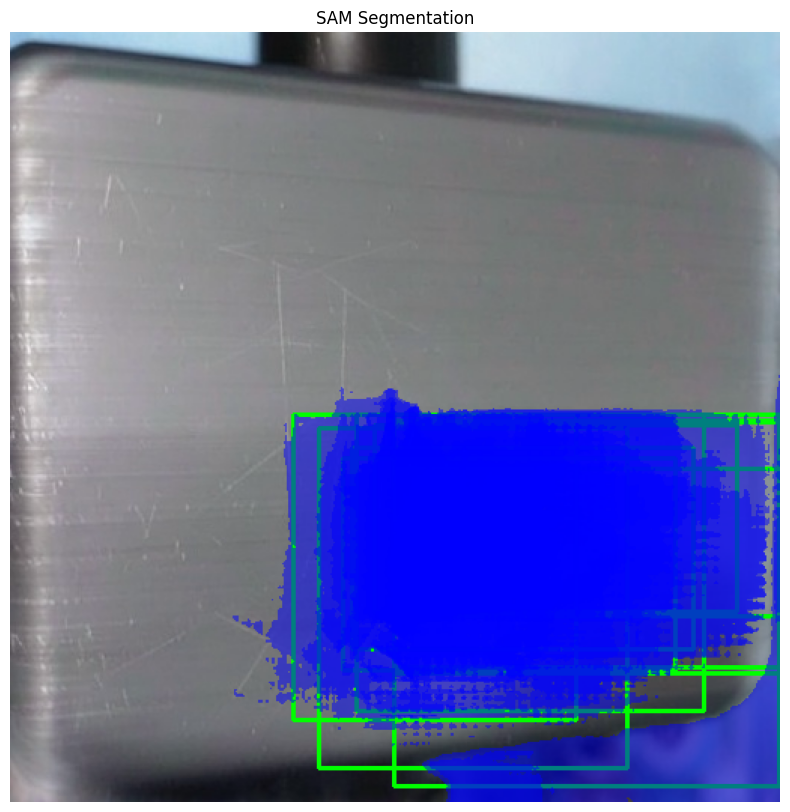

In [3]:
sam = SAM(
    checkpoint_path="../data/weights/sam_vit_h_4b8939.pth",
    model_type="vit_h",
)

masks = sam.predict(image_path, boxes)
sam.plot(image_path, boxes, masks)